# Visualizing Errors

For any scientific measurement, accurate accounting for errors is nearly as important, if not more important, than accurate reporting of the number itself.
For example, imagine that I am using some astrophysical observations to estimate the Hubble Constant, the local measurement of the expansion rate of the Universe.
I know that the current literature suggests a value of around 71 (km/s)/Mpc, and I measure a value of 74 (km/s)/Mpc with my method. Are the values consistent? The only correct answer, given this information, is this: there is no way to know.

Suppose I augment this information with reported uncertainties: the current literature suggests a value of around 71 $\pm$ 2.5 (km/s)/Mpc, and my method has measured a value of 74 $\pm$ 5 (km/s)/Mpc. Now are the values consistent? That is a question that can be quantitatively answered.

In visualization of data and results, showing these errors effectively can make a plot convey much more complete information.

## Basic Errorbars

A basic errorbar can be created with a single Matplotlib function call:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

C:\Users\EsambatiReddyPrasad\AppData\Local\Temp\ipykernel_12316\3518078781.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


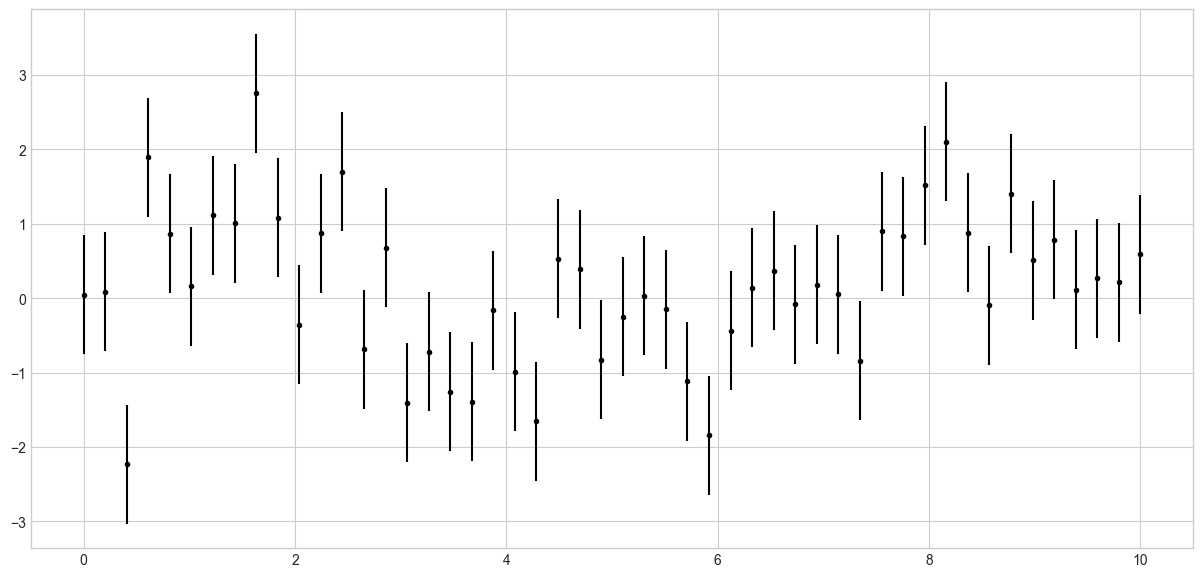

In [2]:
x = np.linspace(0, 10, 50)
dy = 0.8
y = np.sin(x) + dy * np.random.randn(50)

plt.figure(figsize=(15,7))
plt.errorbar(x, y, yerr=dy, fmt='.k');

Here the ``fmt`` is a format code controlling the appearance of lines and points, and has the same syntax as the shorthand used in ``plt.plot``, outlined in [Simple Line Plots](04.01-Simple-Line-Plots.ipynb) and [Simple Scatter Plots](04.02-Simple-Scatter-Plots.ipynb).

In addition to these basic options, the ``errorbar`` function has many options to fine-tune the outputs.
Using these additional options you can easily customize the aesthetics of your errorbar plot.
I often find it helpful, especially in crowded plots, to make the errorbars lighter than the points themselves:

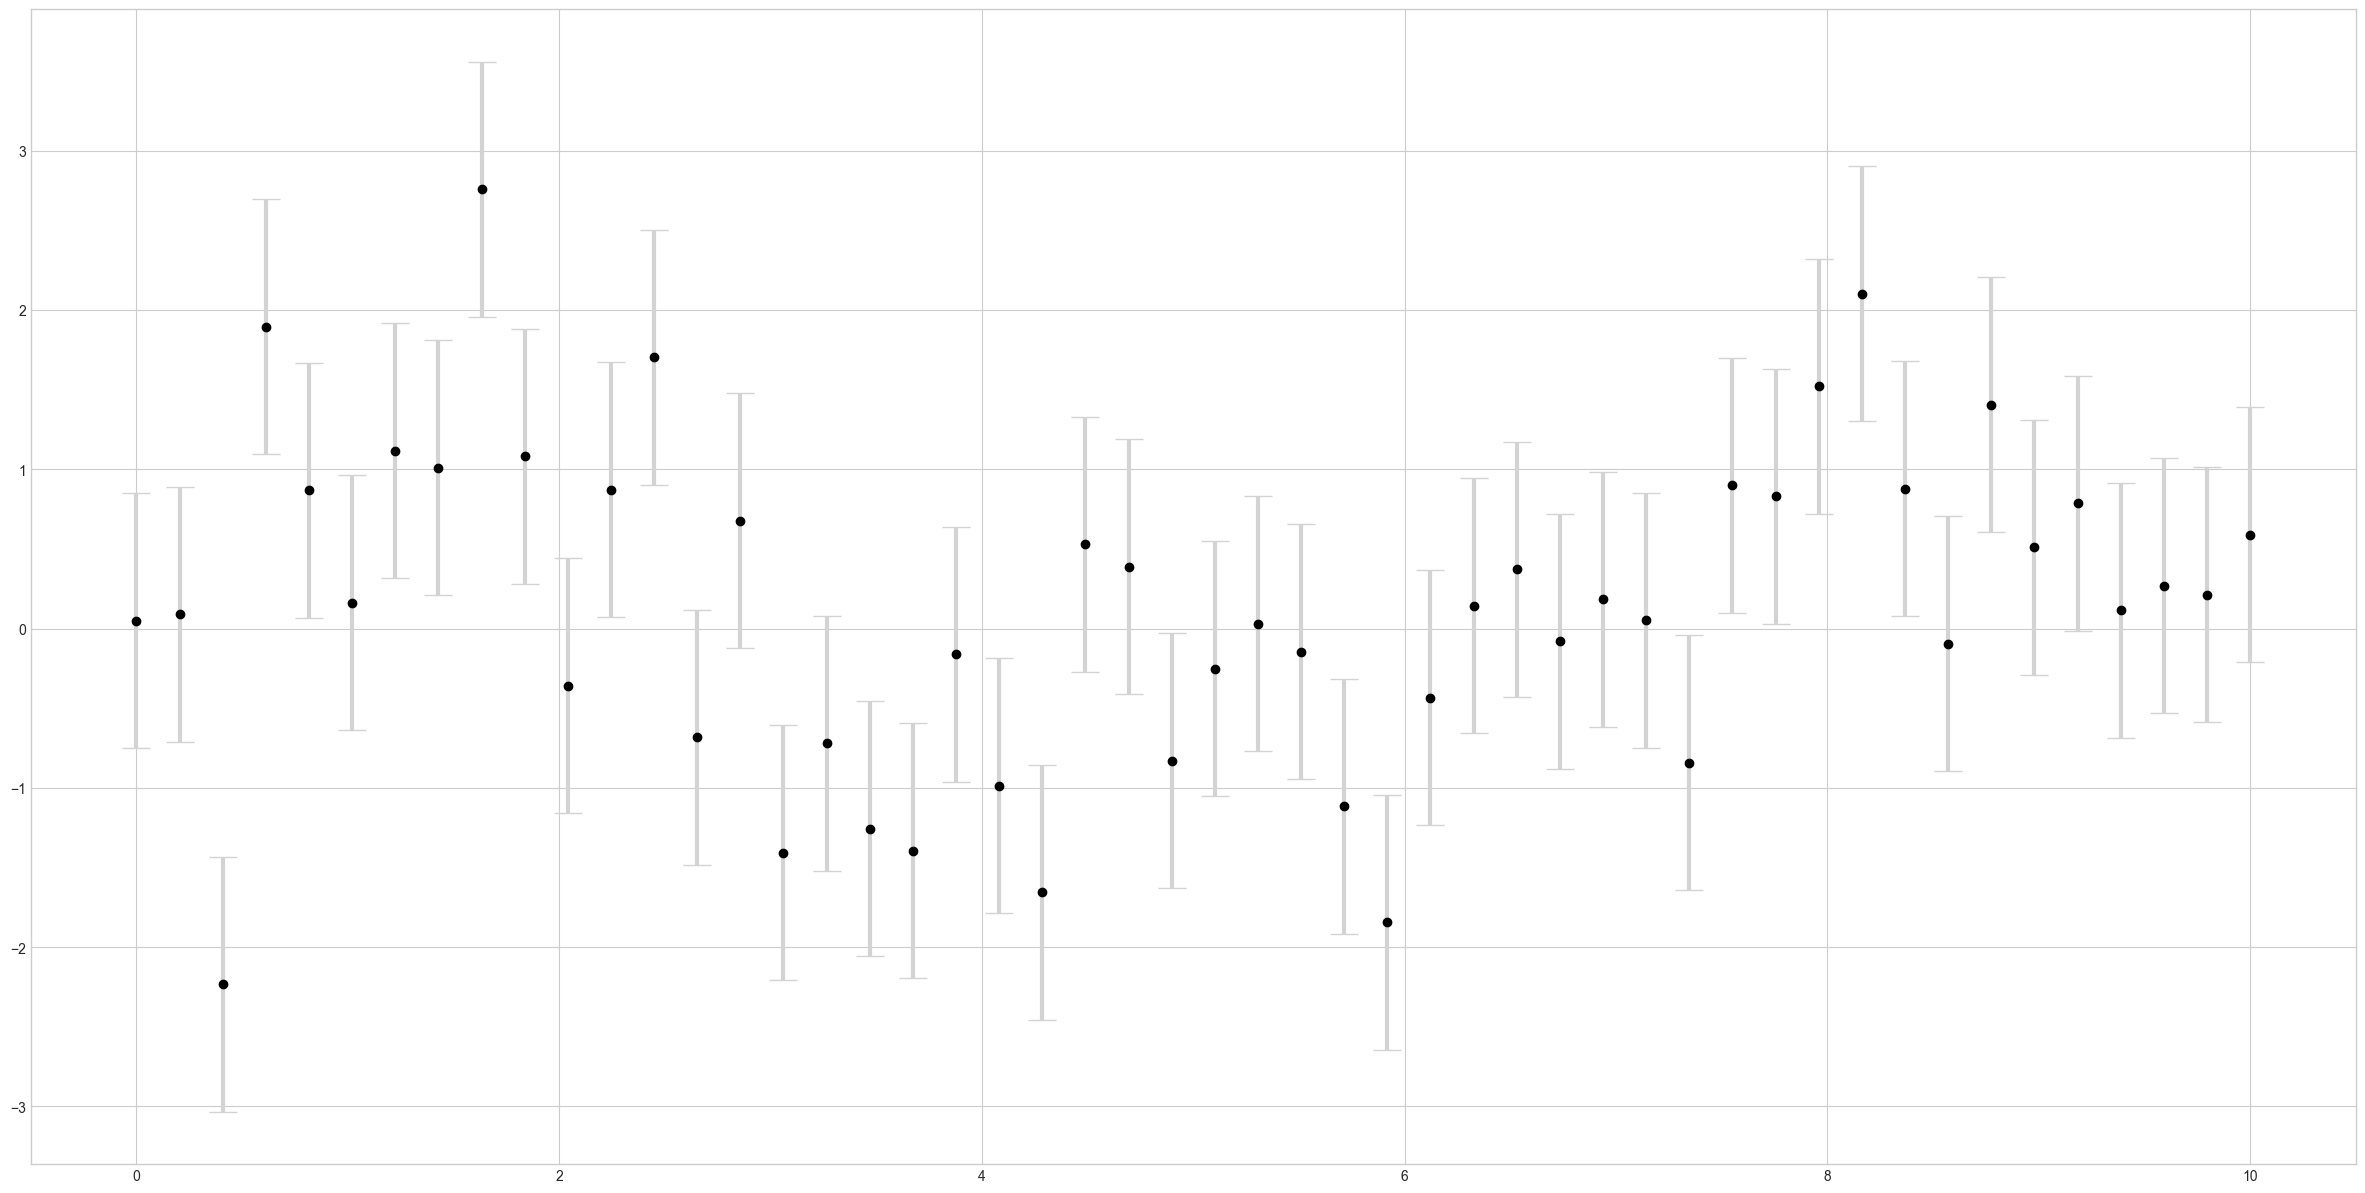

In [5]:
plt.figure(figsize = (30,15))
plt.errorbar(x, y, yerr=dy, fmt='o', color='black',
             ecolor='lightgray', elinewidth=3, capsize=10);

In addition to these options, you can also specify horizontal errorbars (``xerr``), one-sided errorbars, and many other variants.
For more information on the options available, refer to the docstring of ``plt.errorbar``.

In [35]:
no_of_hr_Study = [2,4,6,8,10,12]
actual_marks = [20,30,40,50,60,70]

In [36]:
predicated_marks = [10,12,14,16,18,20]

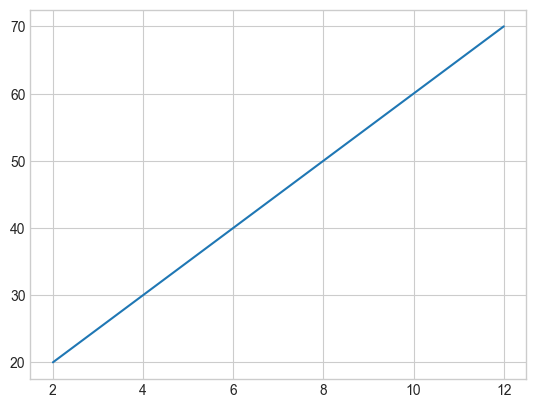

In [37]:
plt.plot(no_of_hr_Study,actual_marks)

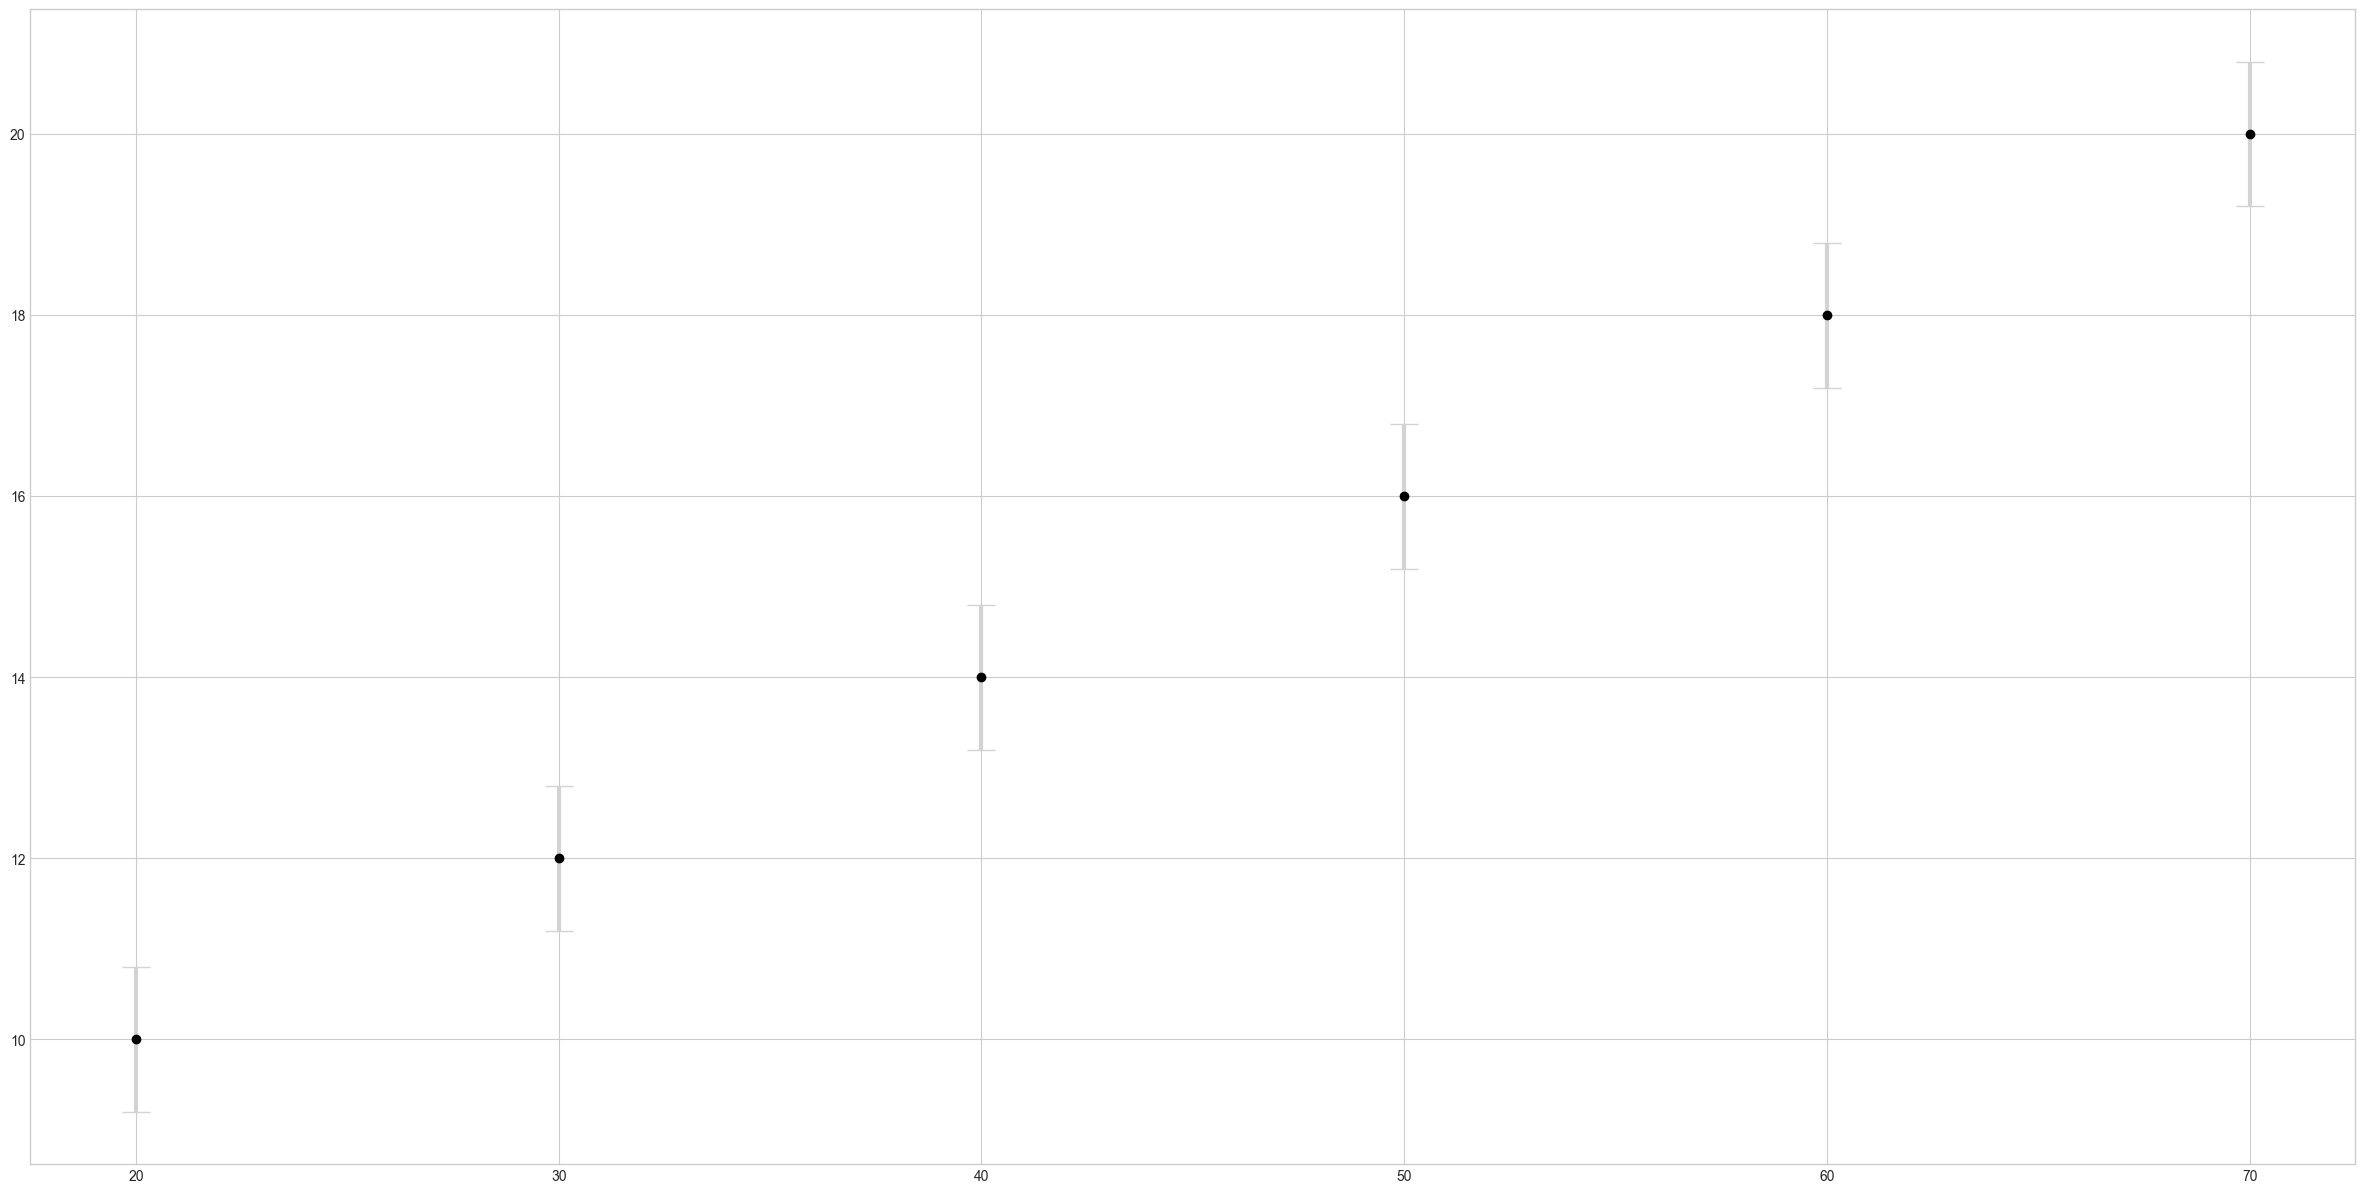

In [39]:
plt.figure(figsize = (30,15))
plt.errorbar(actual_marks, predicated_marks, yerr=dy, fmt='o', color='black',
             ecolor='lightgray', elinewidth=3, capsize=10);

## Continuous Errors

In some situations it is desirable to show errorbars on continuous quantities.
Though Matplotlib does not have a built-in convenience routine for this type of application, it's relatively easy to combine primitives like ``plt.plot`` and ``plt.fill_between`` for a useful result.

Here we'll perform a simple *Gaussian process regression*, using the Scikit-Learn API (see [Introducing Scikit-Learn](05.02-Introducing-Scikit-Learn.ipynb) for details).
This is a method of fitting a very flexible non-parametric function to data with a continuous measure of the uncertainty.
We won't delve into the details of Gaussian process regression at this point, but will focus instead on how you might visualize such a continuous error measurement:

In [45]:
x = np.array([no_of_hr_Study])
y = np.array([actual_marks])

In [61]:
from sklearn.gaussian_process import GaussianProcessRegressor

# define the model and draw some data
model = lambda x: x * np.sin(x)
xdata = np.array([1, 3, 5, 6, 8])
ydata = model(xdata)
ydata

array([ 0.84147098,  0.42336002, -4.79462137, -1.67649299,  7.91486597])

In [62]:
# Compute the Gaussian process fit
# corr='cubic', theta0=1e-2, thetaL=1e-4, thetaU=1E-1
gp = GaussianProcessRegressor(random_state=100)
gp.fit(xdata[:, np.newaxis], ydata)

xfit = np.linspace(0, 10, 1000)

In [63]:
yfit = gp.predict(xfit[:,np.newaxis])
y

array([[20, 30, 40, 50, 60, 70]])

We now have ``xfit``, ``yfit``, and ``dyfit``, which sample the continuous fit to our data.
We could pass these to the ``plt.errorbar`` function as above, but we don't really want to plot 1,000 points with 1,000 errorbars.
Instead, we can use the ``plt.fill_between`` function with a light color to visualize this continuous error:

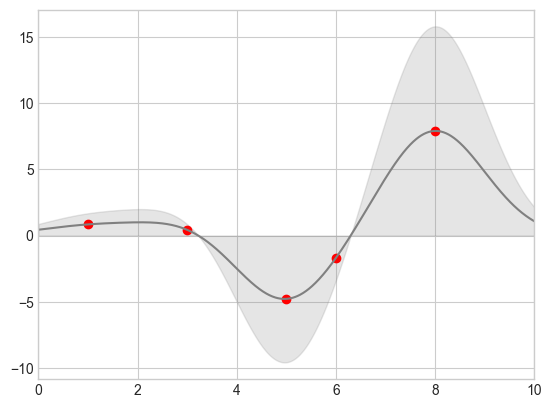

In [65]:
# Visualize the result
plt.plot(xdata, ydata, 'or')
plt.plot(xfit, yfit, '-', color='gray')

plt.fill_between(xfit, yfit - yfit, yfit + yfit,
                 color='gray', alpha=0.2)
plt.xlim(0, 10);

Note what we've done here with the ``fill_between`` function: we pass an x value, then the lower y-bound, then the upper y-bound, and the result is that the area between these regions is filled.

The resulting figure gives a very intuitive view into what the Gaussian process regression algorithm is doing: in regions near a measured data point, the model is strongly constrained and this is reflected in the small model errors.
In regions far from a measured data point, the model is not strongly constrained, and the model errors increase.

For more information on the options available in ``plt.fill_between()`` (and the closely related ``plt.fill()`` function), see the function docstring or the Matplotlib documentation.

Finally, if this seems a bit too low level for your taste, refer to [Visualization With Seaborn](04.14-Visualization-With-Seaborn.ipynb), where we discuss the Seaborn package, which has a more streamlined API for visualizing this type of continuous errorbar.

In [66]:
N = 21
x = np.linspace(0,10,11)
y = [3.9,4.4,10.8,10.3,11.3,13.1,14.1,9.9,13.9,15.1,12.5]

In [67]:
# we ahve fit a line curve an estimated its y-values and their error.
a,b =np.polyfit(x,y,deg=1)

$y = mx+b$ or $y=a+bx$

In [68]:
y_est = a*x+b

In [69]:
y_est

array([ 6.43181818,  7.31454545,  8.19727273,  9.08      ,  9.96272727,
       10.84545455, 11.72818182, 12.61090909, 13.49363636, 14.37636364,
       15.25909091])

In [70]:
y_err = x.std()*np.sqrt(1/len(x)+(x - x.mean())**2 / np.sum((x - x.mean())**2))

In [71]:
y_err

array([1.78376517, 1.53741223, 1.31425748, 1.12815215, 1.        ,
       0.95346259, 1.        , 1.12815215, 1.31425748, 1.53741223,
       1.78376517])

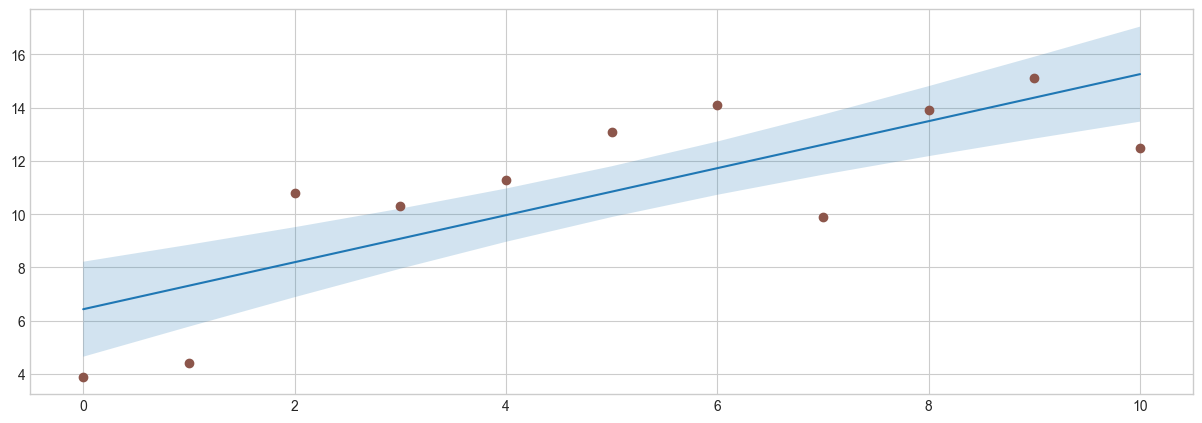

In [29]:
fig,ax= plt.subplots(figsize=(15,5))
ax.plot(x,y_est,'-')
ax.fill_between(x, y_est - y_err,y_est+y_err,alpha=0.2)
ax.plot(x,y,'o',color='tab:brown')

In [73]:
x = np.arange(-5, 5, 0.01)
y1 = -5*x*x + x + 10
y2 = 5*x*x + x

Text(0.5, 1.0, 'Fill Between')

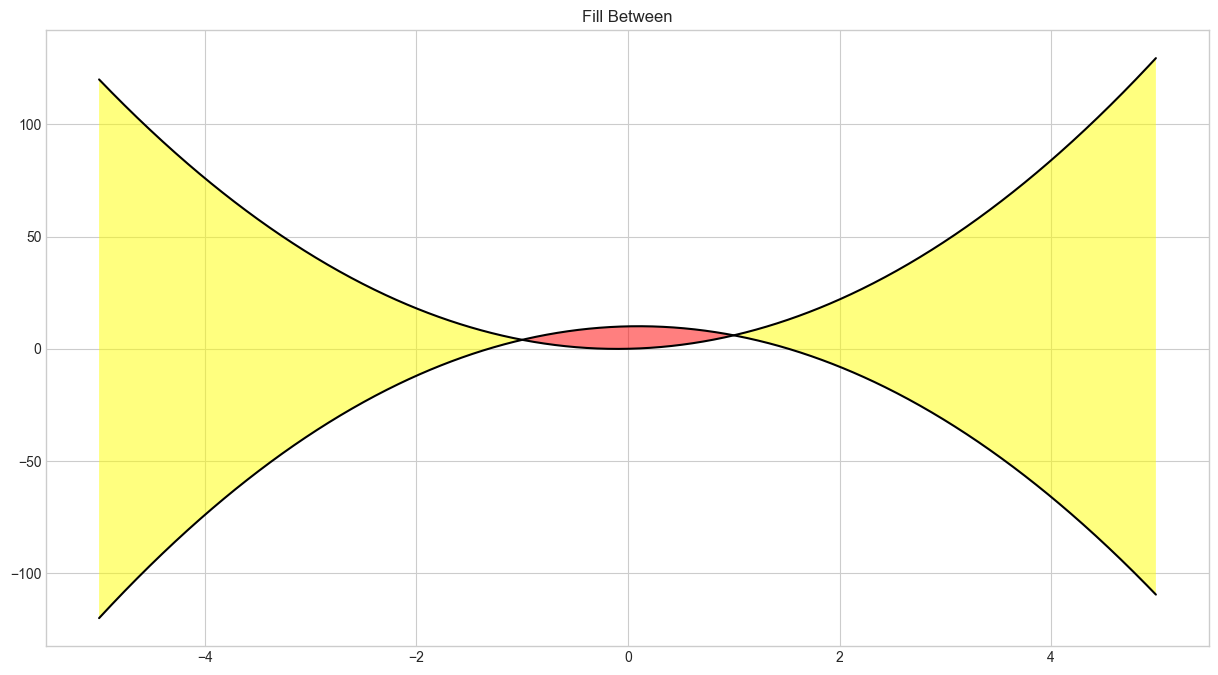

In [74]:
fig, ax = plt.subplots(figsize=(15,8))
ax.plot(x, y1, x, y2, color='black')
ax.fill_between(x, y1, y2, where=(y2 > y1), facecolor='yellow', alpha=0.5)
ax.fill_between(x, y1, y2, where=(y2 <= y1), facecolor='red', alpha=0.5)
ax.set_title('Fill Between')

In [75]:
x = np.arange(0.1, 4, 0.5)
y = np.exp(-x)

In [76]:
# example error bar values that vary with x-position
error = 0.1 + 0.2 * x

<Figure size 640x480 with 0 Axes>

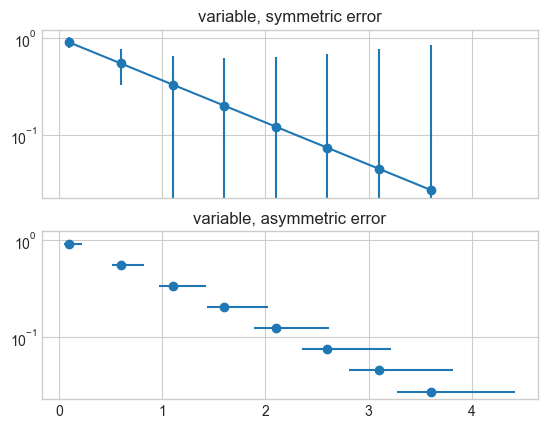

In [80]:
plt.figure()
fig,(ax0,ax1) = plt.subplots(nrows=2,sharex=True,sharey=True)
ax0.errorbar(x,y,yerr=error,fmt='-o')
ax0.set_title("variable, symmetric error")


lower_error = 0.4*error
upper_error = error
asymmetric_error = [lower_error,upper_error]

ax1.errorbar(x,y,xerr=asymmetric_error,fmt='o')
ax1.set_title("variable, asymmetric error")
ax1.set_yscale('log')
plt.show()